/var/folders/0q/ndw_qsrd5cbch1pd347wrwx40000gn/T/ipykernel_75039/3292380539.py:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Meta-analysis + FDR Table.csv")


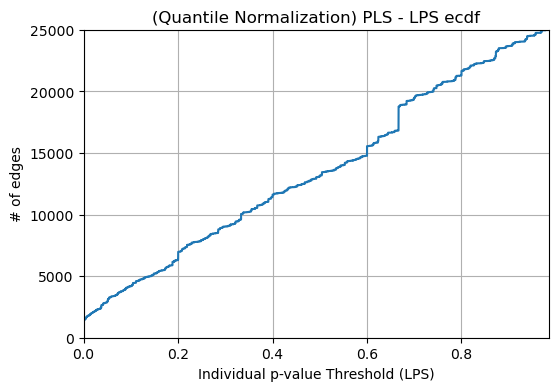

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Meta-analysis + FDR Table.csv")

# Drop rows where FDR is null
df = df.dropna(subset=["FDR"])

#------------------------------- CHANGE THIS -------------------------------
pvals = df["LPS p-values"].dropna().values
#------------------------------- CHANGE THIS -------------------------------

# Sort p-values
pvals_sorted = np.sort(pvals)

# Compute cumulative counts (number of edges up to each p-value threshold)
edge_counts = np.arange(1, len(pvals_sorted) + 1)

# Plot
plt.figure(figsize=(6,4))
plt.step(pvals_sorted, edge_counts, where="post")
plt.xlabel("Individual p-value Threshold (LPS)")
plt.ylabel("# of edges")
plt.title("(Quantile Normalization) PLS - LPS ecdf")
plt.xlim(0, pvals_sorted.max())  # force x-axis to start at 0
plt.ylim(0, edge_counts.max())  # force y-axis to start at 0
plt.grid(True)
plt.show()


/var/folders/0q/ndw_qsrd5cbch1pd347wrwx40000gn/T/ipykernel_75039/1870753870.py:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Meta-analysis + FDR Table.csv")


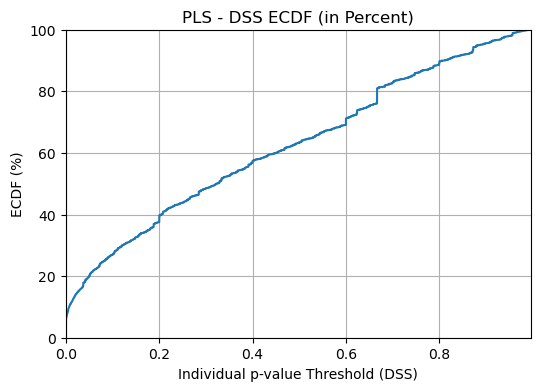

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Meta-analysis + FDR Table.csv")

# Drop rows where FDR is null
df = df.dropna(subset=["FDR"])

#------------------------------- CHANGE THIS -------------------------------
pvals = df["DSS p-values"].dropna().values
#------------------------------- CHANGE THIS -------------------------------

# Sort p-values
pvals_sorted = np.sort(pvals)

# Compute ECDF as percentage
ecdf_percent = np.arange(1, len(pvals_sorted) + 1) / len(pvals_sorted) * 100

# Plot
plt.figure(figsize=(6,4))
plt.step(pvals_sorted, ecdf_percent, where="post")
plt.xlabel("Individual p-value Threshold (DSS)")
plt.ylabel("ECDF (%)")
plt.title("PLS - DSS ECDF (in Percent)")
plt.xlim(0, pvals_sorted.max())   # x-axis starts at 0
plt.ylim(0, 100)                  # y-axis 0–100%
plt.grid(True)
plt.show()

In [19]:
import pandas as pd

# Load CSV
df = pd.read_csv("Meta-analysis + FDR Table.csv")

# Keep only rows where the 9th column (index 8) is True
filtered_df = df[df.iloc[:, 8] == True]

# Get the 3rd column (index 2)
third_col = filtered_df.iloc[:, 2]

# Count positive and negative
positive = (third_col > 0).sum()
negative = (third_col < 0).sum()

print("Number of rows that are positive:", positive)
print("Number of rows that are negative:", negative)
print("Positive to Negative Ratio:", positive/negative)

/var/folders/0q/ndw_qsrd5cbch1pd347wrwx40000gn/T/ipykernel_75039/2910323646.py:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Meta-analysis + FDR Table.csv")


Number of rows that are positive: 20521
Number of rows that are negative: 4497
Positive to Negative Ratio: 4.563264398487881


In [9]:
import pandas as pd

# Load CSV
df = pd.read_csv("Meta-analysis + FDR Table.csv")

# Select only columns 1,2,4,6,8,9 (indices 0,1,3,5,7,8)
selected_df = df.iloc[:, [0, 1, 3, 5, 7, 8]].copy()

# Initialize Max_Value column as NaN
selected_df["Max_Value"] = pd.NA

# For rows where "Consistent?" (last col, index 5) is True → calculate max across cols 2,3,4
mask = selected_df.iloc[:, 5] == True
selected_df.loc[mask, "Max_Value"] = selected_df.loc[mask].iloc[:, [2, 3, 4]].max(axis=1)

# Save to new CSV
selected_df.to_csv("filtered_with_max.csv", index=False)

print("New CSV file 'filtered_with_max.csv' created successfully.")

New CSV file 'filtered_with_max.csv' created successfully.


In [11]:
import pandas as pd

# Load CSV
df = pd.read_csv("filtered_with_max.csv")

# Get unique metabolites from columns 1 and 2
metabolites_col1 = df.iloc[:, 0].dropna().unique()
metabolites_col2 = df.iloc[:, 1].dropna().unique()
unique_metabolites = sorted(set(metabolites_col1).union(set(metabolites_col2)))

# Build result DataFrame
results = []

for metabolite in unique_metabolites:
    # Find all rows where metabolite is in col 1 or col 2
    mask = (df.iloc[:, 0] == metabolite) | (df.iloc[:, 1] == metabolite)
    subset = df.loc[mask, df.columns[6]]  # 7th column = index 6
    
    if not subset.empty:
        min_val = subset.min()
    else:
        min_val = None  # in case it's missing
    
    results.append([metabolite, min_val])

# Create new DataFrame
unique_df = pd.DataFrame(results, columns=["Metabolite", "Min_Col7"])

# Save to CSV
unique_df.to_csv("unique_metabolites_with_min.csv", index=False)

print("Table saved as 'unique_metabolites_with_min.csv'")
print(unique_df.head())

Table saved as 'unique_metabolites_with_min.csv'
                                          Metabolite  Min_Col7
0                             5-Hydroxyhexanoic acid  0.000509
1  (2S,3R)-3-[(4E,7E)-Nona-4,7-dienoyl]-N,N-bis(t...       NaN
2                  (6S)-5-Methyltetrahydrofolic acid       NaN
3  (7a-Isopropenyl-4,5-dimethyloctahydroinden-4-y...       NaN
4      (9H-fluoren-9-yl)methanol, O-methoxycarbonyl-  0.124318


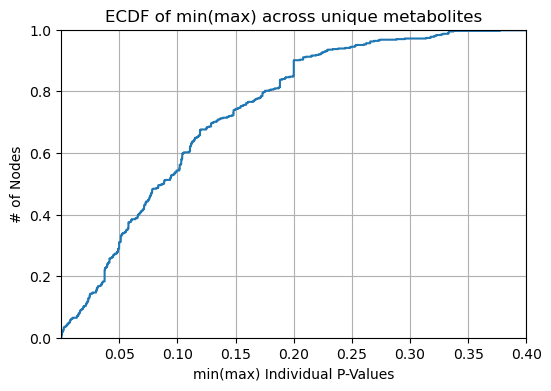

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the unique metabolites table
df = pd.read_csv("unique_metabolites_with_min.csv")

# Take the second column (Min_Col7), drop NaN
values = df.iloc[:, 1].dropna().values

# Sort values
sorted_vals = np.sort(values)

# Compute ECDF
ecdf = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)

# Plot ECDF
plt.figure(figsize=(6,4))
plt.step(sorted_vals, ecdf, where="post")
plt.xlabel("min(max) Individual P-Values")
plt.ylabel("# of Nodes")
plt.title("ECDF of min(max) across unique metabolites")
plt.xlim(sorted_vals.min(), sorted_vals.max())
plt.ylim(0, 1)
plt.grid(True)
plt.show()

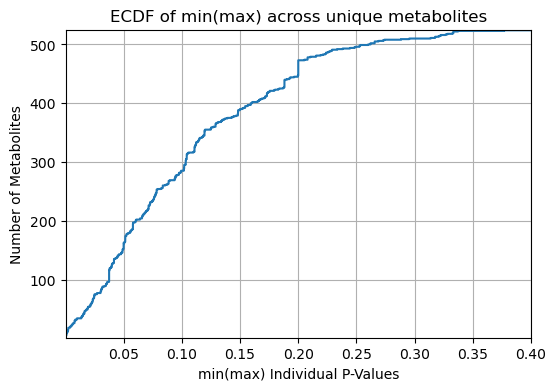

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the unique metabolites table
df = pd.read_csv("unique_metabolites_with_min.csv")

# Take the second column (Min_Col7), drop NaN
values = df.iloc[:, 1].dropna().values

# Sort values
sorted_vals = np.sort(values)

# Compute ECDF counts (actual number of metabolites)
ecdf_counts = np.arange(1, len(sorted_vals) + 1)

# Plot ECDF
plt.figure(figsize=(6,4))
plt.step(sorted_vals, ecdf_counts, where="post")
plt.xlabel("min(max) Individual P-Values")
plt.ylabel("Number of Metabolites")
plt.title("ECDF of min(max) across unique metabolites")
plt.xlim(sorted_vals.min(), sorted_vals.max())
plt.ylim(1, len(sorted_vals))
plt.grid(True)
plt.show()

In [26]:
import pandas as pd

# Load CSV
df = pd.read_csv("Meta-analysis + FDR Table.csv")

# Keep only rows where the 9th column (index 8) is True
true_val = df[df.iloc[:, 8] == True]
print(len(true_val))

# Keep only rows where the 9th column (index 8) is True
false_val = df[df.iloc[:, 8] == False]
print(len(false_val))

print(len(true_val) + len(false_val))

25018
118995
144013


/var/folders/0q/ndw_qsrd5cbch1pd347wrwx40000gn/T/ipykernel_75039/701093890.py:4: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Meta-analysis + FDR Table.csv")


/var/folders/0q/ndw_qsrd5cbch1pd347wrwx40000gn/T/ipykernel_75039/4037937677.py:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Meta-analysis + FDR Table.csv")


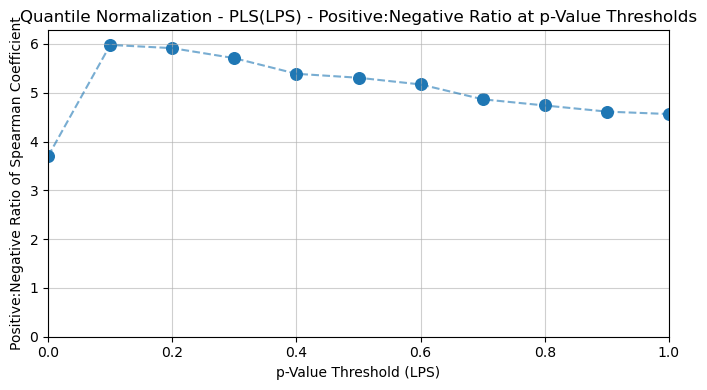

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Meta-analysis + FDR Table.csv")

# Drop rows where FDR is null
df = df.dropna(subset=["FDR"])

# Define columns
pval_col = "LPS p-values"
value_col = "LPS r"

# Drop rows with missing values
df = df.dropna(subset=[pval_col, value_col])

# Define p-value thresholds (0 → 1, step 0.1)
thresholds = np.arange(0, 1.01, 0.1)

ratios = []
for t in thresholds:
    subset = df[df[pval_col] <= t]
    if len(subset) == 0:
        ratios.append(np.nan)
        continue
    pos = np.sum(subset[value_col] > 0)
    neg = np.sum(subset[value_col] < 0)
    ratio = pos / neg if neg > 0 else np.nan
    ratios.append(ratio)

# Plot scatter
plt.figure(figsize=(7, 4))
plt.scatter(thresholds, ratios, s=70)
plt.plot(thresholds, ratios, alpha=0.6, linestyle="--")
plt.xlabel("p-Value Threshold (LPS)")
plt.ylabel("Positive:Negative Ratio of Spearman Coefficient")
plt.title("Quantile Normalization - PLS(LPS) - Positive:Negative Ratio at p-Value Thresholds")
plt.xlim(0, 1)  # start x-axis at 0
plt.ylim(0, np.nanmax(ratios) * 1.05 if np.nanmax(ratios) > 0 else 1)  # start y-axis at 0
plt.grid(alpha=0.6)
plt.tight_layout()

plt.savefig("positive_negative_ratio.png", dpi=300)

plt.show()

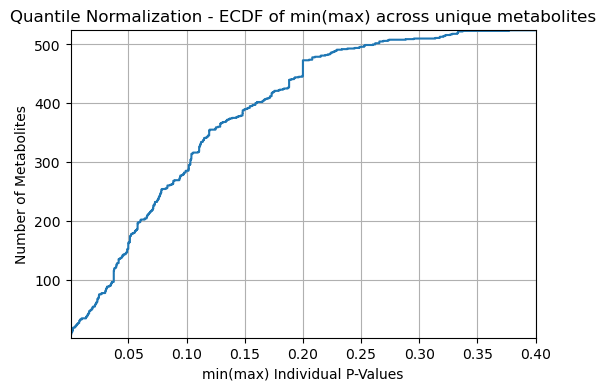

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the unique metabolites table
df = pd.read_csv("unique_metabolites_with_min.csv")

# Take the second column (Min_Col7), drop NaN
values = df.iloc[:, 1].dropna().values

# Sort values
sorted_vals = np.sort(values)

# Compute ECDF counts (actual number of metabolites)
ecdf_counts = np.arange(1, len(sorted_vals) + 1)

# Plot ECDF
plt.figure(figsize=(6,4))
plt.step(sorted_vals, ecdf_counts, where="post")
plt.xlabel("min(max) Individual P-Values")
plt.ylabel("Number of Metabolites")
plt.title("Quantile Normalization - ECDF of min(max) across unique metabolites")
plt.xlim(sorted_vals.min(), sorted_vals.max())
plt.ylim(1, len(sorted_vals))
plt.grid(True)
plt.show()

/var/folders/0q/ndw_qsrd5cbch1pd347wrwx40000gn/T/ipykernel_75039/349860811.py:7: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  met = pd.read_csv("Meta-analysis + FDR Table.csv")


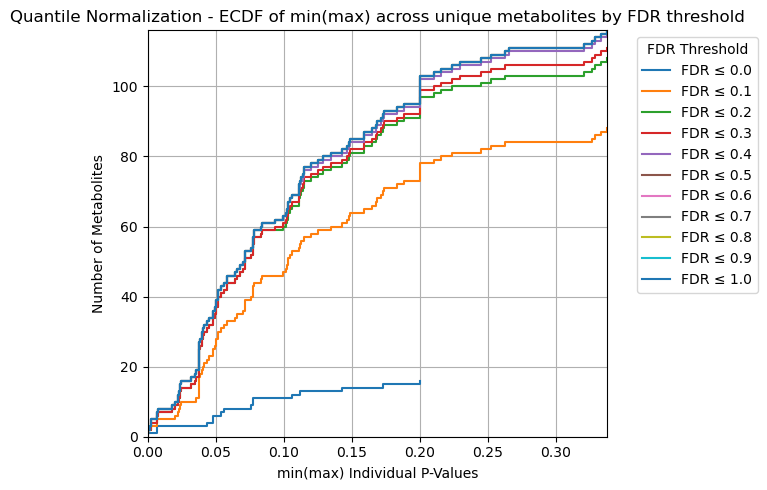

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("unique_metabolites_with_min.csv")
met = pd.read_csv("Meta-analysis + FDR Table.csv")

# Extract relevant columns
values = df.iloc[:, 1].dropna().values  # e.g., Min_Col7
fdr = met.iloc[:, 10].values  # 11th column (Python uses 0-indexing)

# Ensure same length if needed (depends on your data alignment)
min_len = min(len(values), len(fdr))
values = values[:min_len]
fdr = fdr[:min_len]

# Define FDR thresholds (0.0, 0.1, 0.2, ..., 1.0)
thresholds = np.arange(0.0, 1.01, 0.1)

plt.figure(figsize=(7, 5))

for thr in thresholds:
    # Select metabolites with FDR <= current threshold
    mask = fdr <= thr
    vals_thr = values[mask]

    # Skip if none meet threshold
    if len(vals_thr) == 0:
        continue

    # Sort and compute ECDF counts
    sorted_vals = np.sort(vals_thr)
    ecdf_counts = np.arange(1, len(sorted_vals) + 1)

    # Plot ECDF
    plt.step(sorted_vals, ecdf_counts, where="post", label=f"FDR ≤ {thr:.1f}")

plt.xlabel("min(max) Individual P-Values")
plt.ylabel("Number of Metabolites")
plt.xlim(0, sorted_vals.max())
plt.ylim(0, len(sorted_vals))

plt.title("Quantile Normalization - ECDF of min(max) across unique metabolites by FDR threshold")
plt.grid(True)
plt.legend(title="FDR Threshold", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
        #  Unique nodes
        unique_nodes = pd.concat([matches["Metabolite 1"], matches["Metabolite 2"]]).unique()
        unique_node_count = len(unique_nodes)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Meta-analysis + FDR Table.csv")

# Drop rows where FDR is null
df = df.dropna(subset=["FDR"])

#------------------------------- UNIQUE NODES -------------------------------
# Assuming your dataframe has columns like 'Metabolite 1' and 'Metabolite 2'
unique_nodes = pd.concat([df["Metabolite 1"], df["Metabolite 2"]]).unique()
unique_node_count = len(unique_nodes)

print(f"Number of unique nodes: {unique_node_count}")

Number of unique nodes: 529


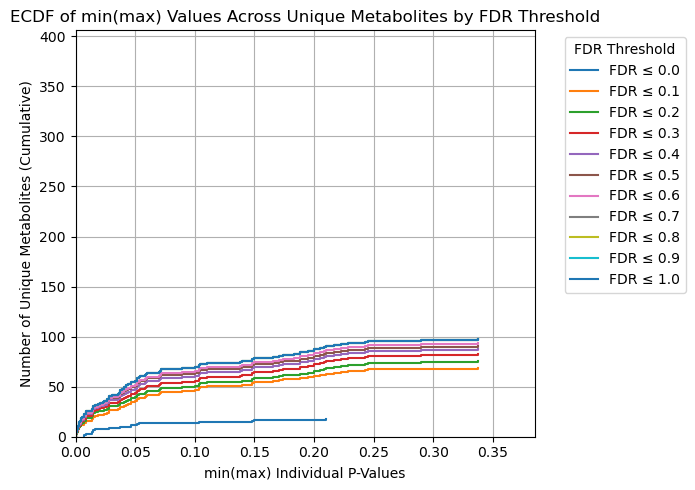

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df_min = pd.read_csv("unique_metabolites_with_min.csv")   # contains min(max) values
df_meta = pd.read_csv("Meta-analysis + FDR Table.csv")    # contains FDR info

# Extract relevant columns
min_values = df_min.iloc[:, 1].dropna().values    # assuming 2nd column holds min(max) values
fdr_values = df_meta.iloc[:, 10].values           # assuming 11th column is FDR (0-indexed)

# Ensure same length
min_len = min(len(min_values), len(fdr_values))
min_values = min_values[:min_len]
fdr_values = fdr_values[:min_len]

# Define thresholds (for coloring/grouping)
thresholds = np.arange(0.0, 1.01, 0.1)

# Create ECDF plot
plt.figure(figsize=(7, 5))

for thr in thresholds:
    # Select metabolites with FDR ≤ current threshold
    mask = fdr_values <= thr
    vals_thr = min_values[mask]

    if len(vals_thr) == 0:
        continue

    # Sort and compute ECDF counts (unique metabolites)
    sorted_vals = np.sort(vals_thr)
    ecdf_counts = np.arange(1, len(sorted_vals) + 1)

    # Plot ECDF
    plt.step(sorted_vals, ecdf_counts, where="post", label=f"FDR ≤ {thr:.1f}")

# Labels & formatting
plt.xlabel("min(max) Individual P-Values")
plt.ylabel("Number of Unique Metabolites (Cumulative)")
plt.title("ECDF of min(max) Values Across Unique Metabolites by FDR Threshold")
plt.xlim(0, min_values.max())
plt.ylim(0, len(min_values))
plt.grid(True)
plt.legend(title="FDR Threshold", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

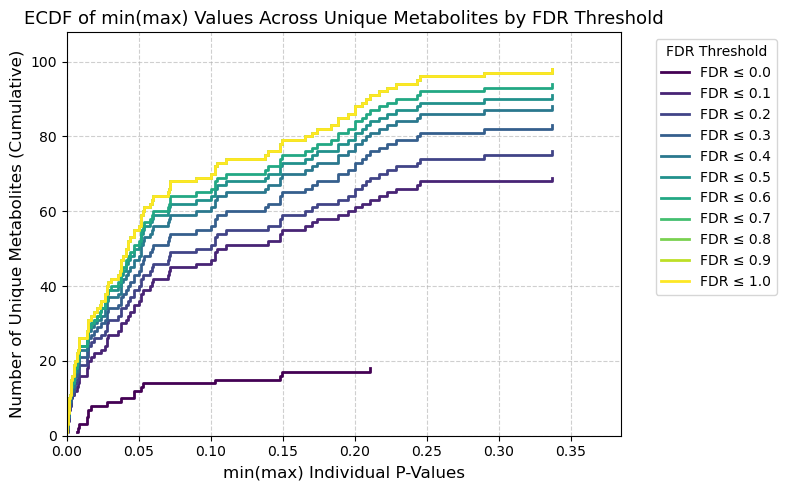

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df_min = pd.read_csv("unique_metabolites_with_min.csv")   # contains min(max) values
df_meta = pd.read_csv("Meta-analysis + FDR Table.csv")    # contains FDR info

# Extract relevant columns
min_values = df_min.iloc[:, 1].dropna().values    # assuming 2nd column holds min(max) values
fdr_values = df_meta.iloc[:, 10].values           # assuming 11th column is FDR (0-indexed)

# Ensure same length
min_len = min(len(min_values), len(fdr_values))
min_values = min_values[:min_len]
fdr_values = fdr_values[:min_len]

# Define thresholds (for coloring/grouping)
thresholds = np.arange(0.0, 1.01, 0.1)

# Choose a color map
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(thresholds)))

# Create ECDF plot
plt.figure(figsize=(8, 5))

max_y = 0  # track the largest ECDF value across thresholds

for thr, color in zip(thresholds, colors):
    # Select metabolites with FDR ≤ current threshold
    mask = fdr_values <= thr
    vals_thr = min_values[mask]

    if len(vals_thr) == 0:
        continue

    # Sort and compute ECDF counts (unique metabolites)
    sorted_vals = np.sort(vals_thr)
    ecdf_counts = np.arange(1, len(sorted_vals) + 1)
    max_y = max(max_y, ecdf_counts.max())  # track largest y value

    # Plot ECDF
    plt.step(sorted_vals, ecdf_counts, where="post", color=color, label=f"FDR ≤ {thr:.1f}", linewidth=2)

# Labels & formatting
plt.xlabel("min(max) Individual P-Values", fontsize=12)
plt.ylabel("Number of Unique Metabolites (Cumulative)", fontsize=12)
plt.title("ECDF of min(max) Values Across Unique Metabolites by FDR Threshold", fontsize=13)
plt.xlim(0, min_values.max())
plt.ylim(0, max_y * 1.1)  # Make y-axis go to 110% of max value
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="FDR Threshold", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df_min = pd.read_csv("unique_metabolites_with_min.csv")   # contains min(max) values
df_meta = pd.read_csv("Meta-analysis + FDR Table.csv")    # contains FDR info

# Extract relevant columns
min_values = df_min.iloc[:, 1].dropna().values    # assuming 2nd column holds min(max) values
fdr_values = df_meta.iloc[:, 10].values           # assuming 11th column is FDR (0-indexed)

# Ensure same length
min_len = min(len(min_values), len(fdr_values))
min_values = min_values[:min_len]
fdr_values = fdr_values[:min_len]

# Define thresholds (for coloring/grouping)
thresholds = np.arange(0.0, 1.01, 0.1)

# Choose a color map
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, len(thresholds)))

# Create ECDF plot
plt.figure(figsize=(8, 5))

max_y = 0  # track the largest ECDF value across thresholds

for thr, color in zip(thresholds, colors):
    # Select metabolites with FDR ≤ current threshold
    mask = fdr_values <= thr
    vals_thr = min_values[mask]

    if len(vals_thr) == 0:
        continue

    # Sort and compute ECDF counts (unique metabolites)
    sorted_vals = np.sort(vals_thr)
    ecdf_counts = np.arange(1, len(sorted_vals) + 1)
    max_y = max(max_y, ecdf_counts.max())  # track largest y value

    # Plot ECDF
    plt.step(sorted_vals, ecdf_counts, where="post", color=color, label=f"FDR ≤ {thr:.1f}", linewidth=2)

# Labels & formatting
plt.xlabel("min(max) Individual P-Values", fontsize=12)
plt.ylabel("Number of Unique Metabolites (Cumulative)", fontsize=12)
plt.title("ECDF of min(max) Values Across Unique Metabolites by FDR Threshold", fontsize=13)
plt.xlim(0, min_values.max())
plt.ylim(0, max_y * 1.1)  # Make y-axis go to 110% of max value
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="FDR Threshold", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

KeyError: '[1195, 1212, 1225, 1258, 1274, 1289, 1318, 1372, 1391, 1415, 1421, 1483, 1485, 1545, 1560, 1661, 1664, 1771, 1833, 1909, 2028, 2119, 2154, 2157, 2310, 2349, 2353, 2371, 2382, 2391, 2474, 2476, 2600, 2645, 2666, 2741, 2744, 2747, 2863, 2907, 2939, 2946, 2964, 2978, 2981, 2984, 2985, 2991, 2997, 2999, 3014, 3016, 3020, 3029, 3031, 3037, 3039, 3040, 3041, 3045, 3047, 3051, 3052, 3059, 3060, 3063, 3075, 3079, 3081, 3082, 3099, 3107, 3111, 3113, 3115, 3117, 3118, 3126, 3127, 3142, 3145, 3147, 3148, 3150, 3151, 3157, 3158, 3167, 3168, 3177, 3184, 3189, 3206, 3209, 3216, 3220, 3230, 3231, 3235, 3238, 3241, 3244, 3249, 3256, 3261, 3262, 3271, 3278, 3283, 3287, 3291, 3299, 3319, 3320, 3321, 3331, 3338, 3340, 3360, 3366, 3371, 3372, 3379, 3381, 3384, 3387, 3393, 3394, 3404, 3405, 3414, 3423, 3435, 3462, 3477, 3481, 3484, 3487, 3489, 3494, 3495, 3496, 3497, 3500, 3503, 3504, 3508, 3512, 3517, 3526, 3534, 3535, 3536, 3542, 3546, 3549, 3556, 3560, 3569, 3592, 3609, 3623, 3657, 3680, 3684, 3695, 3711, 3764, 3808, 3830, 3849, 3902, 3928, 3934, 3979, 4008, 4051, 4143, 4144, 4151, 4398, 4440, 4614, 4636, 4771, 4961, 4962, 4970, 5028, 5049, 5056, 5103, 5145, 5332, 5341, 5346, 5360, 5368, 5379, 5424, 5441, 5456, 5464, 5483, 5491, 5499, 5523, 5529, 5534, 5549, 5557, 5568, 5578, 5587, 5614, 5616, 5624, 5737, 5742, 5755, 5768, 5818, 5819, 5853, 5928, 5955, 5963, 5995, 5997, 6022, 6030, 6067, 6140, 6150, 6177, 6203, 6355, 6385, 6430, 6525, 6549, 6586, 6607, 6694, 6757, 6767, 6802, 6831, 7016, 7017, 7030, 7042, 7069, 7134, 7181, 7184, 7281, 7495, 7602, 7607, 7615, 7683, 7687, 7707, 7710, 7719, 7720, 7728, 7775, 7783, 7847, 7849, 7860, 7880, 7934, 7941, 7958, 7967, 7969, 7980, 7994, 8017, 8020, 8024, 8034, 8095, 8125, 8165, 8174, 8187, 8191, 8198, 8199, 8246, 8247, 8250, 8269, 8271, 8274, 8279, 8289, 8293, 8300, 8303, 8304, 8308, 8309, 8312, 8314, 8322, 8323, 8324, 8330, 8333, 8334, 8335, 8339, 8342, 8343, 8345, 8346, 8358, 8364, 8365, 8375, 8376, 8379, 8389, 8391, 8394, 8398, 8401, 8409, 8421, 8424, 8425, 8428, 8431, 8432, 8437, 8438, 8448, 8451, 8472, 8479, 8480, 8481, 8489, 8493, 8499, 8503, 8513, 8518, 8520, 8521, 8524, 8527, 8539, 8540, 8557, 8566, 8567, 8570, 8577, 8580, 8581, 8582, 8591, 8596, 8602, 8603, 8604, 8608, 8614, 8625, 8628, 8637, 8643, 8644, 8647, 8654, 8662, 8664, 8667, 8670, 8675, 8680, 8688, 8693, 8696, 8706, 8717, 8729, 8730, 8734, 8737, 8739, 8742, 8744, 8745, 8761, 8764, 8767, 8770, 8771, 8772, 8777, 8778, 8779, 8783, 8787, 8791, 8795, 8798, 8800, 8806, 8808, 8809, 8818, 8819, 8820, 8825, 8832, 8834, 8837, 8839, 8842, 8846, 8869, 8999, 9005, 9082, 9167, 9236, 9300, 9356, 9364, 9396, 9450, 9468, 9592, 9606, 9746, 9753, 9780, 9785, 9959, 10094, 10135, 10218, 10226, 10279, 10284, 10330, 10360, 10362, 10436, 10525, 10564, 10605, 10647, 10653, 10654, 10711, 10713, 10719, 10757, 10758, 10777, 10779, 10813, 10821, 10826, 10832, 10836, 10839, 10863, 10893, 10916, 10928, 10930, 11051, 11066, 11135, 11142, 11158, 11187, 11190, 11196, 11220, 11222, 11251, 11266, 11268, 11372, 11383, 11407, 11430, 11441, 11487, 11494, 11519, 11637, 11682, 11693, 11721, 11739, 12341, 12372, 12373, 12388, 12528, 12535, 12536, 12586, 12594, 12617, 12621, 12753, 12814, 12882, 12913, 12918, 12919, 12931, 12934, 12945, 12948, 12967, 12974, 12976, 12986, 12988, 12991, 13019, 13029, 13033, 13037, 13049, 13058, 13065, 13072, 13089, 13121, 13132, 13135, 13149, 13154, 13171, 13175, 13178, 13180, 13190, 13200, 13210, 13225, 13231, 13286, 13313, 13329, 13334, 13357, 13360, 13398, 13400, 13434, 13441, 13453, 13461, 13478, 13482, 13483, 13502, 13527, 13666, 13669, 13672, 13699, 13710, 13712, 13757, 13786, 13795, 13826, 13837, 13850, 13858, 13872, 13886, 13910, 13955, 13956, 13985, 13988, 14000, 14002, 14006, 14010, 14024, 14040, 14043, 14049, 14135, 14174, 14180, 14188, 14193, 14204, 14217, 14238, 14433, 14437, 14439, 14469, 14498, 14523, 14528, 14568, 14578, 14652, 14777, 14779, 14794, 14810, 14829, 14887, 14990, 15006, 15100, 15208, 15284, 15348, 15572, 15700, 15775, 15778, 15791, 15805, 15808, 15810, 15830, 15918, 15920, 15941, 15960, 15963, 16007, 16024, 16031, 16038, 16054, 16110, 16142, 16167, 16255, 16266, 16270, 16297, 16327, 16449, 16487, 16540, 16607, 16618, 16751, 16783, 16795, 16853, 16878, 16976, 16993, 17030, 17044, 17132, 17140, 17304, 17314, 17330, 17363, 17446, 17584, 17634, 17640, 17645, 17651, 17669, 17675, 17707, 17718, 17730, 17733, 17750, 17761, 17779, 17806, 17810, 17961, 18201, 18206, 18241, 18270, 18273, 18299, 18317, 18348, 18375, 18376, 18383, 18451, 18547, 18551, 18554, 18645, 18646, 18650, 18683, 18685, 18686, 18698, 18721, 18736, 18737, 18760, 18779, 18783, 18793, 18817, 18835, 18837, 18842, 18847, 18849, 18868, 18893, 18918, 18924, 18944, 18972, 18979, 18980, 18984, 18985, 19008, 19070, 19095, 19113, 19130, 19142, 19153, 19155, 19157, 19162, 19165, 19166, 19180, 19196, 19202, 19207, 19343, 19413, 19430, 19436, 19442, 19459, 19481, 19489, 19501, 19504, 19538, 19581, 19588, 19642, 19681, 19716, 19756, 19798, 19903, 19928, 19946, 19962, 20015, 20129, 20279, 20281, 20330, 20340, 20350, 20351, 20355, 20367, 20370, 20377, 20386, 20387, 20400, 20408, 20412, 20413, 20421, 20422, 20437, 20443, 20445, 20450, 20462, 20485, 20505, 20518, 20525, 20530, 20536, 20544, 20556, 20567, 20578, 20582, 20608, 20611, 20615, 20621, 20635, 20655, 20671, 20679, 20688, 20694, 20715, 20718, 20751, 20754, 20756, 20757, 20774, 20776, 20782, 20784, 20791, 20798, 20799, 20800, 20803, 20810, 20819, 20837, 20844, 20855, 20863, 20893, 20920, 20939, 20955, 20969, 20975, 20976, 20982, 20983, 21016, 21020, 21036, 21037, 21064, 21073, 21080, 21089, 21097, 21102, 21111, 21128, 21165, 21176, 21178, 21179, 21210, 21217, 21255, 21256, 21259, 21266, 21292, 21311, 21315, 21366, 21369, 21380, 21396, 21415, 21417, 21453, 21588, 21608, 21616, 21648, 21674, 21856, 21915, 21950, 21954, 21972, 21983, 21997, 22014, 22015, 22022, 22026, 22034, 22057, 22092, 22101, 22102, 22128, 22165, 22198, 22203, 22206, 22210, 22216, 22234, 22249, 22253, 22258, 22273, 22276, 22294, 22295, 22315, 22319, 22335, 22341, 22346, 22368, 22372, 22392, 22421, 22429, 22436, 22445, 22452, 22475, 22483, 22484, 22500, 22504, 22517, 22521, 22570, 22586, 22613, 22684, 22706, 22772, 22793, 22797, 22798, 22799, 22800, 22822, 22878, 22882, 22922, 22982, 23053, 23070, 23079, 23083, 23175, 23198, 23260, 23322, 23394, 23424, 23426, 23589, 23628, 23680, 23682, 23696, 23712, 23826, 23856, 23887, 23904, 23966, 23970, 23971, 24042, 24043, 24097, 24105, 24107, 24130, 24145, 24150, 24202, 24233, 24287, 24293, 24326, 24330, 24385, 24405, 24409, 24410, 24415, 24462, 24473, 24565, 24568, 24590, 24598, 24606, 24661, 24662, 24682, 24685, 24729, 25341, 25344, 25345, 25395, 25406, 25449, 25451, 25470, 25488, 25499, 25528, 25596, 25635, 25652, 25682, 25685, 25718, 25735, 25744, 25756, 25762, 25792, 25850, 25878, 25928, 26256, 26345, 26366, 26983, 27026, 27103, 27122, 27138, 27155, 27161, 27178, 27225, 27227, 27236, 27259, 27273, 27274, 27284, 27286, 27297, 27326, 27332, 27363, 27367, 27377, 27422, 27435, 27509, 27525, 27548, 27590, 27620, 27632, 27669, 27682, 27702, 27705, 27710, 27768, 27899, 27965, 28009, 28016, 28058, 28091, 28102, 28111, 28138, 28155, 28157, 28212, 28232, 28242, 28264, 28303, 28312, 28339, 28345, 28381, 28382, 28409, 28412, 28430, 28431, 28473, 28485, 28493, 28515, 28517, 28533, 28557, 28562, 28587, 28616, 28647, 28655, 28748, 28795, 28841, 28883, 28916, 28976, 28994, 29098, 29130, 29152, 29168, 29182, 29190, 29210, 29226, 29230, 29248, 29260, 29281, 29285, 29289, 29292, 29298, 29310, 29311, 29318, 29327, 29329, 29340, 29346, 29368, 29377, 29402, 29409, 29420, 29433, 29464, 29468, 29470, 29512, 29527, 29530, 29534, 29569, 29574, 29578, 29611, 29621, 29635, 29638, 29642, 29663, 29677, 29697, 29701, 29707, 29733, 29857, 29896, 29901, 29909, 29954, 29985, 30003, 30032, 30101, 30157, 30216, 30308, 30331, 30336, 30337, 30366, 30382, 30385, 30386, 30391, 30439, 30450, 30474, 30490, 30500, 30519, 30526, 30543, 30548, 30552, 30559, 30582, 30594, 30607, 30613, 30615, 30616, 30624, 30678, 30680, 30683, 30692, 30726, 30735, 30744, 30748, 30755, 30776, 30780, 30786, 30804, 30808, 30814, 30822, 30828, 30841, 30859, 30899, 30913, 30934, 30935, 30942, 30945, 30972, 30983, 31000, 31013, 31030, 31037, 31047, 31054, 31059, 31061, 31082, 31093, 31099, 31112, 31120, 31132, 31136, 31141, 31180, 31198, 31199, 31210, 31225, 31284, 31288, 31295, 31325, 31341, 31343, 31346, 31779, 31942, 31953, 31996, 32025, 32090, 32137, 32142, 32237, 32247, 32301, 32326, 32340, 32396, 32416, 32428, 32432, 32546, 32570, 32606, 32645, 32672, 32748, 32802, 32808, 32841, 32884, 32956, 33521, 33523, 33525, 33613, 33629, 33672, 33761, 33791, 33798, 33872, 33888, 33918, 34008, 34179, 34220, 34252, 34324, 34351, 34353, 34356, 34519, 34558, 34576, 34594, 34609, 34666, 34715, 34751, 34761, 34780, 34788, 34880, 34994, 35042, 35062, 35069, 35104, 35128, 35130, 35140, 35170, 35220, 35221, 35225, 35237, 35238, 35261, 35280, 35367, 35385, 35404, 35462, 35480, 35576, 35577, 35601, 35621, 35629, 35647, 35657, 35662, 35765, 35937, 35960, 35970, 36031, 36195, 36243, 36280, 36297, 36336, 36411, 36458, 36462, 36466, 36489, 36690, 36730, 36743, 36748, 36770, 36850, 36867, 36879, 36888, 36926, 36930, 36937, 36954, 36968, 36971, 36979, 37009, 37135, 37176, 37201, 37210, 37243, 37273, 37368, 37676, 37723, 37801, 37817, 37887, 37900, 37919, 37943, 37988, 37999, 38030, 38194, 38207, 38265, 38292, 38319, 38320, 38324, 38327, 38329, 38339, 38340, 38355, 38388, 38392, 38395, 38396, 38398, 38410, 38418, 38422, 38427, 38431, 38445, 38469, 38470, 38481, 38489, 38490, 38496, 38500, 38502, 38508, 38510, 38515, 38525, 38532, 38534, 38536, 38556, 38563, 38565, 38566, 38568, 38570, 38578, 38579, 38592, 38594, 38598, 38629, 38631, 38635, 38642, 38651, 38652, 38662, 38664, 38668, 38672, 38680, 38685, 38697, 38707, 38710, 38714, 38736, 38740, 38741, 38769, 38775, 38780, 38788, 38792, 38794, 38804, 38805, 38806, 38815, 38816, 38822, 38829, 38844, 38909, 38989, 39017, 39033, 39069, 39099, 39100, 39107, 39121, 39135, 39139, 39166, 39188, 39195, 39196, 39200, 39203, 39256, 39272, 39329, 39332, 39360, 39383, 39385, 39414, 39415, 39420, 39450, 39457, 39464, 39465, 39469, 39473, 39482, 39505, 39512, 39513, 39524, 39546, 39552, 39559, 39582, 39588, 39622, 39659, 39683, 39696, 39709, 39713, 39714, 39716, 39780, 39847, 39870, 39873, 39891, 39927, 39983, 39996, 39999, 40031, 40072, 40078, 40084, 40085, 40108, 40127, 40148, 40171, 40306, 40352, 40399, 40413, 40421, 40466, 40564, 40591, 40606, 40610, 40644, 40731, 40909, 40975, 40997, 41004, 41007, 41020, 41059, 41141, 41199, 41289, 41291, 41293, 41306, 41405, 41525, 41530, 41532, 41561, 41587, 41615, 41636, 41639, 41702, 41724, 41741, 41756, 41774, 41804, 41805, 41811, 41823, 41827, 41840, 41847, 41858, 41884, 41901, 41931, 41971, 42038, 42181, 42187, 42214, 42418, 42623, 42727, 42931, 43001, 43623, 43645, 43664, 43680, 43714, 43715, 43732, 43735, 43744, 43762, 43768, 43773, 43815, 43849, 43859, 43999, 44082, 44102, 44107, 44171, 44180, 44318, 44327, 44364, 44407, 44417, 44573, 44626, 44656, 44658, 44664, 44732, 44767, 44838, 45073, 45215, 45243, 45274, 45283, 45309, 45319, 45326, 45390, 45496, 45550, 45565, 45570, 45888, 45923, 45952, 45977, 46092, 46112, 46131, 46163, 46175, 46201, 46234, 46254, 46265, 46282, 46286, 46312, 46319, 46375, 46384, 46406, 46412, 46429, 46430, 46474, 46489, 46555, 46556, 46618, 46638, 46676, 46684, 46706, 46730, 46759, 46812, 46832, 46841, 46848, 46858, 46866, 46877, 46888, 46952, 46965, 47018, 47033, 47049, 47063, 47094, 47095, 47107, 47169, 47194, 47250, 47251, 47271, 47368, 47382, 47398, 47431, 47442, 47447, 47450, 47464, 47471, 47618, 47645, 47673, 47679, 47699, 47728, 47778, 47831, 47871, 47973, 47988, 48002, 48117, 48130, 48142, 48162, 48277, 48302, 48311, 48332, 48341, 48358, 48381, 48405, 48476, 48516, 48550, 48614, 48626, 48664, 48689, 49335, 49348, 49350, 49363, 49375, 49408, 49491, 49539, 49586, 49588, 49689, 49748, 49752, 49756, 49774, 49803, 49910, 49924, 49931, 49984, 50036, 50092, 50150, 50188, 50254, 50301, 50331, 50341, 50362, 50371, 50397, 50429, 50505, 50542, 50567, 50670, 50709, 50727, 51340, 51406, 51514, 51516, 51519, 51666, 51686, 51714, 51728, 51736, 51751, 51763, 51848, 51875, 51883, 51900, 51909, 51941, 51987, 51990, 52014, 52138, 52182, 52239, 52251, 52265, 52295, 52299, 52336, 52349, 52362, 52380, 52675, 52684, 52701, 52719, 52747, 52761, 52790, 52824, 52847, 52864, 52935, 52942, 52961, 52968, 52978, 52981, 52985, 52999, 53007, 53026, 53027, 53034, 53106, 53109, 53175, 53195, 53209, 53230, 53270, 53292, 53335, 53343, 53354, 53378, 53404, 53444, 53451, 53467, 53497, 53504, 53560, 53614, 53629, 53680, 53693, 53702, 53710, 53717, 53721, 53733, 54258, 54261, 54262, 54265, 54267, 54284, 54291, 54294, 54303, 54312, 54313, 54318, 54319, 54325, 54340, 54348, 54350, 54351, 54355, 54372, 54373, 54379, 54384, 54393, 54397, 54409, 54410, 54420, 54439, 54440, 54457, 54459, 54460, 54496, 54502, 54503, 54504, 54515, 54516, 54520, 54523, 54527, 54531, 54541, 54548, 54555, 54560, 54576, 54582, 54584, 54586, 54596, 54621, 54644, 54645, 54660, 54664, 54676, 54678, 54683, 54686, 54691, 54692, 54711, 54720, 54746, 54875, 54917, 54945, 54962, 54988, 54995, 55025, 55105, 55120, 55125, 55179, 55220, 55226, 56326, 56416, 56462, 56522, 56561, 56567, 56650, 57280, 57296, 57414, 57462, 57593, 57681, 57696, 57700, 57739, 57801, 57802, 57854, 57867, 57899, 57905, 57930, 57935, 57975, 58012, 58102, 58172, 58191, 58268, 58292, 58304, 58323, 58360, 58371, 58374, 58377, 58391, 58396, 58402, 58417, 58448, 58476, 58553, 58567, 58579, 58617, 58665, 58724, 58732, 58740, 58745, 58748, 58757, 58797, 58838, 58851, 58899, 59062, 59088, 59118, 59125, 59134, 59143, 59146, 59152, 59180, 59193, 59217, 59321, 59415, 59450, 59452, 59551, 59729, 59755, 59772, 59773, 59784, 59846, 59864, 59870, 59877, 59892, 59908, 59968, 60001, 60142, 60151, 60163, 60165, 60199, 60210, 60212, 60218, 60244, 60249, 60254, 60276, 60287, 60302, 60312, 60316, 60317, 60319, 60320, 60322, 60346, 60350, 60355, 60357, 60362, 60368, 60375, 60390, 60398, 60401, 60408, 60429, 60433, 60434, 60438, 60439, 60449, 60450, 60453, 60461, 60473, 60486, 60487, 60509, 60522, 60532, 60568, 60569, 60571, 60575, 60576, 60582, 60588, 60605, 60606, 60607, 60619, 60630, 60660, 60726, 60742, 60790, 60792, 60824, 60848, 60860, 60866, 60870, 60900, 60937, 61040, 61057, 61097, 61104, 61242, 61250, 61276, 61287, 61308, 61354, 61383, 61386, 61389, 61421, 61446, 61505, 61549, 61588, 61606, 61625, 61631, 61641, 61651, 61671, 61674, 61682, 61683, 61687, 61711, 61724, 61765, 61771, 61774, 61777, 61821, 61830, 61853, 61864, 61876, 61911, 61917, 61923, 61939, 61958, 61974, 61984, 62005, 62009, 62011, 62021, 62028, 62033, 62056, 62057, 62058, 62059, 62071, 62079, 62162, 62185, 62228, 62247, 62273, 62300, 62315, 62319, 62348, 62354, 62470, 62501, 62563, 62604, 62607, 62612, 62629, 62637, 62645, 62650, 62685, 62687, 62715, 62723, 62740, 62743, 62748, 62752, 62756, 62768, 62802, 62804, 62807, 62817, 62820, 62826, 62828, 62837, 62839, 62857, 62858, 62875, 62919, 62937, 62950, 62953, 62971, 62976, 62991, 63028, 63031, 63038, 63050, 63057, 63059, 63136, 63202, 63234, 63276, 63411, 63468, 63486, 63489, 63507, 63524, 63588, 63726, 63743, 63837, 63923, 63995, 64623, 64717, 64851, 65095, 65110, 65193, 65392, 65434, 65457, 65506, 65525, 65538, 65560, 65597, 65727, 65777, 65865, 65876, 65981, 66035, 66135, 66166, 66309, 66430, 66455, 66508, 66586, 66794, 66897, 66913, 66931, 66932, 66937, 66956, 66962, 66990, 66997, 67007, 67034, 67041, 67074, 67075, 67101, 67109, 67110, 67118, 67135, 67142, 67153, 67156, 67159, 67164, 67173, 67175, 67195, 67203, 67208, 67238, 67239, 67260, 67288, 67304, 67315, 67317, 67331, 67338, 67343, 67830, 67974, 67979, 68055, 68098, 68182, 68316, 68344, 68360, 68374, 68399, 68404, 68450, 68468, 68495, 68517, 68578, 68584, 68615, 68662, 68693, 68696, 68722, 68736, 68741, 68748, 68894, 68902, 68918, 68922, 68923, 68925, 68929, 68937, 68938, 68943, 68944, 68952, 68957, 69069, 69081, 69099, 69136, 69144, 69145, 69204, 69296, 69358, 69656, 70203, 70216, 70261, 70307, 70338, 70356, 70390, 70392, 70542, 71645, 71878, 71886, 72098, 72157, 72164, 72213, 72245, 72391, 72405, 72440, 72592, 72655, 72708, 72741, 72768, 72777, 72809, 72839, 72880, 72911, 72985, 73049, 73110, 73122, 73125, 73132, 73164, 73310, 73375, 73408, 73444, 73448, 73475, 73503, 73527, 73530, 73536, 73547, 73569, 73583, 73644, 73658, 73753, 73789, 73797, 73851, 73866, 73868, 73885, 73905, 73911, 73937, 73939, 73950, 73966, 73968, 73982, 73983, 74002, 74042, 74055, 74059, 74073, 74084, 74094, 74101, 74107, 74111, 74121, 74124, 74153, 74163, 74165, 74174, 74181, 74210, 74224, 74239, 74248, 74257, 74261, 74264, 74268, 74274, 74276, 74278, 74279, 74280, 74294, 74296, 74366, 74368, 74430, 74612, 74695, 74707, 74719, 74757, 74798, 74909, 74936, 74951, 74953, 74966, 75189, 75407, 75560, 75611, 75618, 75717, 75718, 75858, 76042, 76044, 76083, 76200, 76230, 76247, 76298, 76318, 76328, 76340, 76399, 76687, 76714, 76719, 76761, 76795, 76832, 76956, 76960, 76967, 76999, 77009, 77011, 77017, 77033, 77081, 77175, 77187, 77313, 77371, 77417, 77443, 77459, 77473, 77507, 77731, 77795, 77955, 77959, 77967, 78008, 78025, 78061, 78066, 78084, 78093, 78142, 78147, 78204, 78346, 78414, 78415, 78661, 78671, 78672, 78695, 78710, 78729, 78746, 78930, 78980, 79226, 79247, 79587, 79652, 79656, 79696, 79722, 79723, 79739, 79760, 79816, 79834, 79852, 79862, 79868, 79921, 79925, 79962, 79968, 79991, 80039, 80075, 80093, 80122, 80125, 80135, 81056, 81105, 81198, 81297, 81305, 81377, 81441, 81503, 81507, 81516, 81606, 81698, 81794, 82191, 82197, 82217, 82230, 82320, 82343, 82380, 82392, 82406, 82500, 82540, 82545, 82564, 82572, 82696, 82743, 82764, 82795, 82842, 82899, 82951, 83057, 83125, 83240, 83241, 83248, 83266, 83278, 83283, 83284, 83295, 83311, 83350, 83356, 83372, 83382, 83403, 83419, 83430, 83467, 83479, 83482, 83487, 83490, 83541, 83583, 83584, 83614, 83618, 83642, 83655, 83672, 83690, 83731, 83856, 83999, 84040, 84047, 84122, 84204, 84257, 84264, 84315, 84505, 84569, 84668, 84702, 84843, 84989, 84991, 85002, 85011, 85017, 85029, 85070, 85071, 85087, 85089, 85091, 85100, 85116, 85128, 85144, 85148, 85153, 85155, 85186, 85197, 85217, 85222, 85265, 85275, 85283, 85348, 85443, 85460, 85471, 85490, 85500, 85579, 85598, 85632, 85660, 85716, 85719, 85784, 85848, 85893, 85896, 85901, 86005, 86112, 86141, 86156, 86162, 86248, 86347, 86390, 86475, 86480, 86585, 86604, 86661, 86705, 86747, 86771, 86816, 86843, 86844, 86866, 86929, 86933, 86996, 87108, 87149, 87282, 87293, 87309, 87369, 87423, 87450, 87510, 87556, 87603, 87611, 87637, 87650, 87713, 87794, 87846, 87855, 87949, 88025, 88036, 88040, 88072, 88092, 88096, 88100, 88107, 88122, 88130, 88160, 88175, 88215, 88271, 88290, 88366, 88367, 88374, 88378, 88392, 88402, 88420, 88431, 88438, 88449, 88460, 88564, 88573, 88594, 88596, 88599, 88631, 88637, 88695, 88759, 88791, 88798, 88816, 88826, 88856, 88861, 88874, 88883, 88934, 88949, 89016, 89017, 89040, 89094, 89233, 89673, 89726, 89752, 89784, 89862, 90064, 90098, 90114, 90130, 90171, 90188, 90196, 90218, 90220, 90333, 90341, 90343, 90354, 90392, 90410, 90414, 90471, 90474, 90475, 90482, 90498, 90535, 90542, 90560, 90561, 90571, 90616, 90622, 90639, 90643, 90650, 90666, 90698, 90700, 90703, 90731, 90737, 90738, 90743, 90752, 90758, 90799, 90805, 90808, 90809, 90821, 90825, 90827, 90836, 90838, 90853, 90856, 90859, 90865, 90866, 90872, 90877, 90880, 90890, 90893, 90903, 90915, 90919, 91009, 91119, 91154, 91219, 91268, 91282, 91321, 91361, 91388, 91403, 91444, 91451, 91458, 91464, 91480, 91494, 91497, 91506, 91517, 91584, 91596, 91616, 91622, 91655, 91659, 91672, 91673, 91676, 91710, 91821, 91833, 91898, 91918, 91987, 92196, 92204, 92225, 92236, 92248, 92252, 92300, 92518, 92605, 92615, 92734, 92747, 92779, 92936, 92990, 93058, 93198, 93254, 93312, 93348, 93404, 93446, 93552, 93572, 93589, 93742, 93795, 93826, 93907, 93981, 94062, 94117, 94166, 94180, 94219, 94226, 94804, 94842, 94999, 95010, 95013, 95078, 95197, 95279, 95363, 95439, 95526, 95542, 95546, 95549, 95553, 95567, 95597, 95628, 95629, 95681, 95692, 95694, 95696, 95716, 95763, 95813, 95866, 95870, 95884, 95898, 95916, 95917, 95920, 95931, 95940, 95946, 95951, 95956, 95960, 95962, 95968, 95997, 96004, 96020, 96030, 96037, 96038, 96041, 96042, 96073, 96075, 96082, 96092, 96093, 96100, 96102, 96116, 96132, 96141, 96143, 96144, 96172, 96177, 96180, 96198, 96205, 96208, 96210, 96217, 96229, 96233, 96247, 96257, 96270, 96274, 96284, 96310, 96316, 96336, 96342, 96355, 96364, 96375, 96380, 96383, 96391, 96417, 96421, 96425, 96439, 96446, 96466, 96528, 96534, 96536, 96546, 96548, 96549, 96572, 96589, 96605, 96635, 96649, 96671, 96676, 96694, 96701, 96777, 96794, 96809, 96818, 96841, 96842, 96854, 96891, 96946, 96965, 97076, 97096, 97133, 97192, 97335, 97339, 97343, 97388, 97418, 97419, 97481, 97507, 97541, 97546, 97557, 97580, 97599, 97638, 97696, 97746, 97771, 97791, 97931, 97936, 97955, 97971, 97994, 98011, 98024, 98055, 98067, 98070, 98078, 98117, 98153, 98196, 98221, 98224, 98235, 98705, 98735, 98842, 98874, 98970, 99083, 99103, 99122, 99123, 99159, 99180, 99191, 99192, 99264, 99339, 99388, 99393, 99418, 99419, 99432, 99471, 99483, 99489, 99915, 99934, 99953, 99958, 99960, 99961, 99964, 99975, 99978, 99998, 100002, 100010, 100020, 100021, 100045, 100047, 100075, 100081, 100091, 100097, 100099, 100105, 100107, 100116, 100121, 100136, 100139, 100141, 100153, 100154, 100187, 100201, 100213, 100214, 100233, 100234, 100243, 100260, 100275, 100294, 100322, 100370, 100388, 100396, 100424, 100434, 100465, 100466, 100481, 100635, 100647, 100673, 100692, 100719, 100743, 100746, 100782, 100791, 100803, 100815, 100823, 100828, 100857, 100859, 100892, 100899, 100904, 100921, 100937, 100992, 101013, 101053, 101068, 101103, 101113, 101131, 101189, 101220, 101226, 101292, 101359, 101461, 101500, 101612, 101642, 101702, 101722, 101738, 101820, 102341, 102363, 102383, 102408, 102443, 102506, 102553, 102605, 102648, 102659, 102687, 102694, 102713, 102714, 102721, 102745, 102772, 102783, 102805, 102806, 102851, 102853, 102876, 102961, 102969, 102990, 102993, 103000, 103004, 103008, 103026, 103036, 103047, 103052, 103074, 103088, 103102, 103105, 103110, 103114, 103118, 103122, 103134, 103144, 103152, 103160, 103161, 103166, 103177, 103182, 103201, 103229, 103237, 103239, 103285, 103286, 103299, 103318, 103335, 103336, 103338, 103345, 103370, 103381, 103400, 103407, 103417, 103823, 103830, 103841, 103896, 103935, 103939, 104015, 104042, 104066, 104092, 104101, 104176, 104221, 104240, 104252, 104323, 104459, 104572, 104651, 104775, 104855, 104931, 104945, 104966, 105370, 105469, 105498, 105504, 105587, 105657, 105727, 106499, 106505, 106527, 106529, 106542, 106576, 106580, 106818, 106835, 106843, 106873, 106877, 106883, 106949, 106990, 107060, 107213, 107252, 107265, 107268, 107271, 107277, 107296, 107301, 107303, 107304, 107307, 107320, 107324, 107329, 107331, 107335, 107343, 107347, 107374, 107384, 107433, 107439, 107441, 107444, 107521, 107538, 107549, 107551, 107590, 107598, 107609, 107616, 107634, 107636, 107653, 107695, 107807, 107823, 107925, 107998, 108021, 108030, 108036, 108041, 108045, 108060, 108099, 108128, 108133, 108134, 108148, 108154, 108188, 108195, 108208, 108215, 108238, 108274, 108319, 108327, 108353, 108382, 108384, 108416, 108443, 108454, 108469, 108482, 108494, 108505, 108540, 108556, 108567, 108569, 108605, 108636, 108642, 108644, 108719, 108726, 108741, 109147, 109243, 109283, 109344, 109434, 109453, 109494, 109506, 109532, 109605, 109611, 109614, 109635, 109680, 109682, 109712, 109726, 109756, 109800, 109835, 109839, 109857, 109884, 109918, 109930, 109975, 109978, 110007, 110104, 110209, 110264, 110298, 110355, 110450, 110546, 110628, 110637, 110666, 110668, 110785, 110869, 110928, 110975, 111033, 111040, 111061, 111077, 111114, 111146, 111152, 111259, 111279, 111295, 111320, 111345, 111346, 111352, 111355, 111361, 111363, 111369, 111376, 111380, 111385, 111390, 111397, 111398, 111424, 111425, 111426, 111435, 111439, 111475, 111479, 111482, 111501, 111505, 111506, 111507, 111508, 111540, 111546, 111554, 111564, 111585, 111587, 111590, 111595, 111600, 111602, 111603, 111612, 111619, 111622, 111630, 111635, 111644, 111645, 111677, 111683, 111688, 111690, 111770, 111771, 111786, 111810, 111819, 111842, 111863, 111877, 111895, 111912, 111941, 112052, 112444, 112512, 112651, 112763, 112776, 112883, 112914, 113020, 113033, 113039, 113071, 113138, 113141, 113170, 113206, 113210, 113225, 113230, 113232, 113246, 113272, 113275, 113306, 113308, 113317, 113344, 113345, 113349, 113372, 113459, 113460, 113465, 113481, 113492, 113500, 113502, 113548, 113576, 113616, 113655, 114253, 114341, 114407, 114463, 114477, 114511, 114610, 114612, 114614, 114626, 114627, 114681, 114729, 114830, 114911, 114933, 114959, 114972, 115004, 115032, 115050, 115080, 115082, 115085, 115117, 115207, 115237, 115245, 115277, 115312, 115596, 116027, 116037, 116042, 116049, 116052, 116065, 116069, 116080, 116096, 116114, 116125, 116127, 116128, 116129, 116134, 116137, 116152, 116173, 116184, 116187, 116189, 116192, 116196, 116231, 116236, 116246, 116267, 116269, 116283, 116285, 116287, 116295, 116296, 116297, 116343, 116357, 116359, 116364, 116369, 116371, 116386, 116464, 116496, 116666, 117104, 117108, 117114, 117125, 117165, 117168, 117197, 117218, 117275, 117356, 117367, 117391, 117430, 117436, 117449, 117451, 117454, 117456, 117487, 117493, 117516, 117518, 117525, 117570, 117575, 117579, 117591, 117597, 117624, 117648, 117660, 117662, 117672, 117687, 117699, 117709, 117710, 117713, 117719, 117722, 117735, 117738, 117766, 117825, 117839, 117846, 117900, 118089, 118131, 118163, 118365, 118390, 118415, 118443, 118507, 118526, 118536, 118539, 118585, 118608, 118656, 118661, 118668, 118746, 118764, 118781, 118939, 118957, 119002, 119094, 119121, 119177, 119206, 119229, 119264, 119412, 119414, 119480, 119526, 119549, 119583, 119616, 119654, 119658, 119713, 119718, 119782, 119803, 119808, 119821, 119850, 119872, 119879, 119906, 119912, 119936, 119939, 119941, 119943, 119951, 119952, 119954, 119962, 119974, 119979, 119989, 120005, 120006, 120030, 120033, 120040, 120082, 120084, 120100, 120102, 120112, 120122, 120137, 120148, 120163, 120167, 120172, 120174, 120183, 120185, 120189, 120248, 120268, 120426, 120451, 120534, 120544, 120547, 120558, 120583, 120588, 120589, 120626, 120638, 120660, 120666, 120670, 120671, 120672, 120673, 120675, 120685, 120687, 120726, 120729, 120739, 120763, 120768, 120790, 120802, 120805, 120809, 120810, 120823, 120832, 120834, 120845, 120857, 120881, 120895, 120905, 120924, 121088, 121176, 121265, 121290, 121358, 121457, 121468, 121482, 121514, 121533, 121545, 121549, 121605, 121608, 121635, 121639, 121651, 121654, 121662, 121663, 121685, 121688, 121691, 121722, 121734, 121755, 121785, 121788, 121818, 121836, 121850, 121873, 121905, 121920, 121932, 121995, 122091, 122231, 122277, 122298, 122426, 122454, 122497, 122525, 122578, 122583, 122604, 122605, 122677, 122719, 122731, 122774, 122793, 122824, 122831, 122879, 122886, 122938, 123093, 123279, 123433, 123496, 123568, 123579, 123615, 123654, 123655, 123657, 123692, 123696, 123820, 123859, 123877, 123888, 123889, 123891, 123894, 123911, 123922, 123926, 123931, 123938, 123975, 124022, 124026, 124032, 124038, 124076, 124078, 124251, 124258, 124265, 124266, 124291, 124316, 124448, 124461, 124474, 124491, 124493, 124495, 124511, 124525, 124539, 124555, 124566, 124639, 124679, 124710, 124807, 124939, 125041, 125121, 125134, 125166, 125173, 125232, 125278, 125288, 125321, 125447, 125472, 125514, 125544, 125606, 125620, 125657, 125785, 125817, 125824, 125842, 125868, 126050, 126109, 126148, 126158, 126191, 126211, 126252, 126284, 126293, 126304, 126371, 126373, 126473, 126486, 126502, 126531, 126555, 126580, 126594, 126636, 126743, 126826, 127024, 127101, 127160, 127162, 127235, 127337, 127406, 127470, 127480, 127481, 127502, 127528, 127572, 127603, 127648, 127676, 127689, 127703, 127745, 127976, 127994, 128049, 128103, 128114, 128152, 128277, 128285, 128451, 128484, 128546, 128606, 128672, 128679, 128700, 128722, 128826, 128830, 128846, 128882, 128923, 128936, 128965, 128995, 128997, 129015, 129032, 129073, 129099, 129102, 129129, 129269, 129294, 129333, 129364, 129369, 129380, 129382, 129385, 129391, 129395, 129428, 129432, 129438, 129446, 129479, 129484, 129501, 129511, 129513, 129531, 129554, 129558, 129567, 129609, 129620, 129623, 129632, 129647, 129657, 129663, 129733, 129791, 129822, 129826, 129950, 130085, 130166, 130242, 130271, 130301, 130305, 130326, 130380, 130547, 130571, 130572, 130752, 130805, 130863, 130935, 130941, 130942, 130948, 130955, 130976, 130977, 130978, 130983, 131003, 131013, 131019, 131022, 131025, 131037, 131039, 131047, 131053, 131071, 131078, 131081, 131109, 131110, 131114, 131115, 131117, 131119, 131120, 131133, 131138, 131139, 131142, 131152, 131153, 131158, 131166, 131169, 131174, 131184, 131193, 131196, 131200, 131212, 131236, 131239, 131242, 131246, 131303, 131320, 131334, 131385, 131419, 131429, 131442, 131493, 131501, 131502, 131505, 131524, 131532, 131535, 131540, 131542, 131543, 131582, 131592, 131595, 131601, 131614, 131639, 131650, 131654, 131670, 131682, 131694, 131698, 131722, 131732, 131743, 131749, 131758, 131775, 131794, 131796, 131800, 131806, 131813, 131865, 131912, 131915, 132075, 132101, 132114, 132132, 132147, 132160, 132207, 132211, 132222, 132283, 132316, 132335, 132370, 132750, 132760, 132761, 132767, 132773, 132780, 132798, 132806, 132825, 132838, 132903, 132912, 132926, 132997, 133027, 133062, 133147, 133221, 133316, 133362, 133385, 133401, 133470, 133475, 133482, 133495, 133534, 133628, 133630, 133646, 133663, 133719, 133823, 133833, 133878, 133915, 134259, 134284, 134295, 134299, 134454, 134458, 134511, 134526, 134846, 134856, 134857, 135101, 135147, 135151, 135204, 135261, 135754, 135789, 135821, 135905, 135941, 136024, 136101, 136157, 136166, 136179, 136184, 136203, 136214, 136237, 136311, 136317, 136318, 136319, 136344, 136381, 136412, 136437, 136447, 136466, 136509, 136539, 136543, 136551, 136554, 136572, 136620, 136624, 136659, 136677, 136775, 136806, 136819, 136854, 136858, 136895, 136905, 136913, 136983, 137043, 137057, 137058, 137081, 137122, 137138, 137151, 137190, 137216, 137270, 137275, 137278, 137289, 137313, 137318, 137323, 137336, 137382, 137385, 137405, 137416, 137418, 137441, 137516, 137621, 137659, 137680, 137694, 137704, 137715, 137722, 137872, 137880, 137888, 137911, 137986, 138042, 138059, 138069, 138071, 138079, 138085, 138092, 138102, 138111, 138118, 138119, 138126, 138156, 138164, 138170, 138190, 138202, 138220, 138229, 138267, 138281, 138289, 138367, 138369, 138372, 138404, 138429, 138532, 138571, 138589, 138646, 138649, 138651, 138755, 138814, 138853, 138871, 138941, 138944, 138967, 139001, 139002, 139013, 139037, 139059, 139061, 139087, 139088, 139090, 139116, 139126, 139136, 139146, 139188, 139203, 139241, 139275, 139322, 139336, 139401, 139402, 139488, 139590, 139640, 139693, 139703, 139764, 139766, 139772, 139814, 139868, 139953, 140053, 140059, 140066, 140078, 140089, 140245, 140247, 140269, 140343, 140382, 140632, 140663, 140666, 140683, 140813, 140975, 141393, 141401, 141459, 141503, 141565, 141567, 141610, 141625, 141653, 141664, 141687, 141722, 141784, 142189, 142194, 142203, 142213, 142323, 142325, 142369, 142389, 142413, 142453, 142458, 142471, 142494, 142657, 142689, 142696, 142724, 142727, 142729, 142738, 142759, 142764, 142796, 142831, 142910, 142911, 142945, 142956, 142991, 143003, 143004, 143018, 143023, 143049, 143063, 143067, 143070, 143071, 143078, 143083, 143085, 143096, 143098, 143133, 143166, 143168, 143178, 143179, 143180, 143185, 143188, 143199, 143212, 143217, 143222, 143245, 143327, 143411, 143481, 143487, 143589, 143592, 143612, 143629, 143631, 143656, 143681, 143698, 143704, 143719, 143728, 143731, 143743, 143744, 143762, 143791, 143969, 143973, 143982, 143996, 144006, 144053, 144072, 144077, 144079, 144110, 144122, 144125, 144140, 144144, 144158, 144187, 144201, 144207, 144222, 144226, 144238, 144244, 144245, 144248, 144260, 144271, 144273, 144283, 144296, 144301, 144306, 144370, 144380, 144522, 144536, 144551, 144554, 144573, 144605, 144623, 144757, 144776, 144851, 144869, 144873, 144902, 144917, 144926, 144930, 144942, 144959, 145019, 145028, 145057, 145114, 145160, 145167, 145208, 145272, 145290, 145294, 145379, 145571, 145614, 145629, 145635, 145661, 145685, 145736, 145844, 145947, 145957, 146037, 146113, 146118, 146205, 146216, 146235, 146260, 146353, 146372, 146374, 146381, 146402, 146416, 146429, 146439, 146473, 146486, 146535, 146555, 146570, 146608, 146610, 146616, 146618, 146716, 146795, 146841, 146928, 146930, 146950, 146997, 147010, 147022, 147146, 147246, 147251, 147285, 147345, 147351, 147417, 147456, 147500, 147551, 147570, 147573, 147749, 147759, 147795, 147818, 147886, 147931, 148016, 148044, 148085, 148098, 148135, 148140, 148172, 148197, 148300, 148332, 148380, 148487, 148577, 148592, 148596, 148626, 148632, 148775, 148852, 148939, 149039, 149064, 149099, 149154, 149155, 149211, 149215, 149274, 149289, 149301, 149336, 149422, 149441, 149559, 149566, 149587, 149592, 149595, 149755, 149769, 149790, 149812, 149839, 149906, 149931, 149950, 150001, 150015, 150033, 150043, 150301, 150395, 150461, 150736, 150744, 150783, 150786, 150819, 150820, 150822, 150837, 150842, 150847, 150854, 150898, 150901, 150922, 150925, 150930, 150941, 150949, 150979, 151003, 151008, 151011, 151014, 151032, 151160, 151174, 151209, 151213, 151231, 151286, 151289, 151348, 151381, 151389, 151393, 151394, 151401, 151420, 151421, 151469, 151479, 151482, 151486, 151511, 151519, 151553, 151563, 151574, 151589, 151591, 151599, 151602, 151617, 151620, 151627, 151648, 151678, 151689, 151694, 151775, 151779, 151820, 151849, 151851, 151896, 151901, 151923, 151950, 151961, 151963, 151965, 151968, 151978, 151993, 151998, 152014, 152021, 152035, 152060, 152062, 152085, 152110, 152129, 152136, 152150, 152236, 152315, 152336, 152364, 152386, 152557, 152589, 152643, 152657, 152669, 152670, 152692, 152719, 152746, 152747, 152766, 152774, 152781, 152785, 152796, 152799, 152809, 152813, 152834, 152886, 152913, 153006, 153042, 153176, 153267, 153337, 153395, 153414, 153459, 153499, 153506, 153527, 153597, 153659, 153727, 153766, 153805, 153875, 153897, 153918, 154037, 154088, 154156, 154182, 154248, 154384, 154391, 154658, 154721, 154738, 154778, 154813, 154829, 155045, 155130, 155194, 155239, 155258, 155283, 155371, 155380, 155437, 155483, 155556, 155600, 155690, 155764, 155768, 155793, 155798, 155813, 155869, 156054, 156095, 156118, 156136, 156319, 156477, 156490, 156564, 156571, 156594, 156603, 156620, 156635, 156636, 156650, 156691, 156693, 156736, 156779, 156814, 156843, 157192, 157217, 157276, 157294, 157344, 157359, 157426, 157466, 157486, 157512, 157670, 157729, 157743, 157786, 158173, 158335, 158359, 158370, 158374, 158384, 158392, 158407, 158574, 158645, 158734, 158773, 158878, 158896, 159036, 159143, 159161, 159168, 159393, 159402, 159404, 159411, 159414, 159417, 159436, 159441, 159444, 159467, 159480, 159484, 159499, 159510, 159517, 159521, 159524, 159525, 159529, 159530, 159532, 159547, 159549, 159560, 159570, 159571, 159573, 159581, 159584, 159650, 159833, 159977, 159981, 159982, 160162, 160190, 160202, 160259, 160295, 160303, 160351, 160355, 160421, 160436, 160527, 160529, 160531, 160547, 160549, 160605, 160611, 160624, 160631, 160678, 160701, 160705, 160720, 160808, 160813, 160857, 160864, 160892, 160896, 160914, 161006, 161044, 161065, 161083, 161101, 161216, 161277, 161312, 161322, 161424, 161454, 161472, 161482, 161483, 161568, 161689, 161730, 161774, 161803, 161833, 161900, 161926, 161996, 162171, 162465, 162504, 162515, 162549, 162557, 162621, 162755, 162765, 162769, 162788, 162809, 162833, 162906, 162912, 163035, 163042, 163049, 163074, 163084, 163318, 163370, 163410, 163543, 163557, 163886, 163979, 163984, 163988, 163994, 164027, 164044, 164060, 164101, 164109, 164117, 164127, 164225, 164239, 164246, 164271, 164288, 164410, 164766, 164977, 164978, 164980, 164985, 164990, 164992, 165008, 165016, 165049, 165093, 165112, 165124, 165218, 165239, 165330, 165408, 165547, 165566, 165576, 165591, 165620, 165630, 165631, 165633, 165644, 165666, 165667, 165684, 165704, 165717, 165723, 165754, 165772, 165776, 165777, 165810, 165830, 165941, 165988, 166145, 166163, 166181, 166221, 166238, 166243, 166268, 166295, 166399, 166402, 166444, 166466, 166475, 166490, 166499, 166743, 166748, 166757, 166807, 166846, 166864, 166908, 166925, 167199, 167247, 167272, 167287, 167370, 167472, 167493, 167498, 167521, 167528, 167604, 167773, 167825, 168163, 168185, 168221, 168314, 168349, 168546, 168592, 168610, 168626, 168875, 168876, 168891, 168918, 168968, 168973, 169045, 169287, 169298, 169655, 169730, 169789, 169824, 169828, 169838, 169846, 169882, 169898, 169905, 169918, 169923, 169925, 169929, 169957, 169961, 169966, 169970, 169974, 169981, 169999, 170005, 170074, 170076, 170307, 170314, 170337, 170506, 170510, 170526, 170529, 170551, 170595, 170614, 170640, 170673, 170809, 170823, 170906, 170907, 170947, 170970, 170973, 170979, 170997, 171041, 171059, 171166, 171196, 171544, 171634, 171663, 171739, 171740, 171754, 171796, 172181, 172205, 172258, 172262, 172265, 172282, 172289, 172312, 172319, 172325, 172327, 172346, 172352, 172366, 172378, 172383, 172454, 172643, 172644, 172664, 172750, 172764, 172803, 172821, 172932, 172933, 172975, 173010, 173011, 173014, 173032, 173086, 173111, 173118, 173182, 173208, 173270, 173284, 173333, 173416, 173426, 173429, 173728, 173856, 173984, 174009, 174069, 174116, 174173, 174174, 174248, 174257, 174285, 174326, 174340, 174354, 174530, 174543, 174550, 174554, 174558, 174576, 174586, 174631, 174642, 174646, 174664, 174681, 174743, 174772, 174852, 174865, 174876, 174904, 175101, 175114, 175119, 175128, 175146, 175149, 175153, 175168, 175171, 175219, 175228, 175232, 175251, 175270, 175272, 175276, 175283, 175291, 175297, 175327, 175329, 175340, 175361, 175378, 175401, 175509, 175541, 175620, 175642, 175654, 175686, 175722, 175758, 175918, 175950, 175964, 176003, 176020, 176052, 176059, 176069, 176156, 176157, 176169, 176202, 176225, 176228, 176233, 176234, 176251, 176257, 176260, 176261, 176269, 176275, 176276, 176277, 176281, 176286, 176341, 176367, 176455, 176496, 176521, 176581, 176583, 176585, 176611, 176622, 176683, 176687, 176690, 176718, 176721, 176730, 176814, 176817, 176821, 176839, 176849, 176871, 176908, 176910, 176920, 176933, 176943, 176960, 176979, 177002, 177009, 177028, 177036, 177043, 177061, 177071, 177155, 177177, 177227, 177291, 177298, 177308, 177316, 177450, 177477, 177582, 177648, 177652, 177657, 177661, 177694, 177712, 177771, 177783, 177810, 177848, 177855, 177877, 177880, 177894, 177976, 177995, 177996, 178001, 178009, 178027, 178039, 178057, 178067, 178078, 178092, 178107, 178112, 178114, 178197, 178226, 178356, 178366, 178379, 178420, 178452, 178487] not in index'